In [4]:
# cd ../finetuning/

In [5]:
from src.utils import generate_directory_tree

In [6]:
generate_directory_tree('.')

.
├── data
│   ├── cpt
│   │   ├── chunks
│   │   │   ├── chunks_cmc_corporation.json
│   │   │   ├── chunks_cmc_global_achievements.json
│   │   │   ├── chunks_cmc_global_awards.json
│   │   │   ├── chunks_cmc_global_core_values.json
│   │   │   └── chunks_cmc_global_history.json
│   │   └── texts
│   │       └── 20250317
│   │           ├── cmc_corporation.txt
│   │           ├── cmc_global_achievements.tx
│   │           ├── cmc_global_awards.txt
│   │           ├── cmc_global_core_values.txt
│   │           └── cmc_global_history.txt
│   └── sft
│       ├── qna
│       │   ├── chunks_cmc_corporation
│       │   │   ├── cmc_corporation__1.json
│       │   │   ├── cmc_corporation__10.json
│       │   │   ├── cmc_corporation__2.json
│       │   │   ├── cmc_corporation__3.json
│       │   │   └── cmc_corporation__4.json
│       │   ├── chunks_cmc_global_achievements
│       │   │   ├── cmc_global_achievements__1.json
│       │   │   ├── cmc_global_achievements__2.json
│       │   │   ├

In [5]:
import json
import os
import pandas as pd

# Đọc dữ liệu từ tất cả các file JSON trong thư mục 'chunks'
chunks_path = 'data/cpt/chunks'
json_files = [f for f in os.listdir(chunks_path) if f.endswith('.json')]

all_chunks = []

# Đọc và lưu tất cả dữ liệu từ các file JSON
for json_file in json_files:
    json_file_path = os.path.join(chunks_path, json_file)
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        all_chunks.extend(data)

# Chuyển dữ liệu JSON thành DataFrame
df_chunks = pd.DataFrame(all_chunks)

# Thống kê cơ bản về dữ liệu chunks (cả chunk_en và chunk_vi)
print("Thống kê về dữ liệu chunks:")
print(df_chunks.describe())

# Tính tổng số lượng chunks
total_chunks = df_chunks.shape[0]
print(f"\nTổng số lượng chunks trong dữ liệu: {total_chunks}")

# Thống kê về độ dài của các đoạn văn (chunk_en và chunk_vi)
df_chunks['length_en'] = df_chunks['chunk_en'].apply(len)
df_chunks['length_vi'] = df_chunks['chunk_vi'].apply(len)

# Thống kê độ dài các đoạn văn
print("\nThống kê về độ dài các đoạn văn:")
print(df_chunks[['length_en', 'length_vi']].describe())

# Liệt kê tất cả các tệp tin văn bản trong thư mục 'texts'
texts_path = 'data/cpt/texts/20250317'
text_files = [f for f in os.listdir(texts_path) if f.endswith('.txt')]

# Đọc và lưu tất cả dữ liệu từ các tệp tin văn bản
all_texts = []

for text_file in text_files:
    text_file_path = os.path.join(texts_path, text_file)
    with open(text_file_path, 'r', encoding='utf-8') as f:
        text_content = f.read()
        all_texts.append({'file_name': text_file, 'content': text_content})

# Chuyển nội dung các tệp tin văn bản thành DataFrame
df_texts = pd.DataFrame(all_texts)

# Thống kê về độ dài nội dung văn bản
df_texts['length'] = df_texts['content'].apply(len)

# Thống kê độ dài văn bản
print("\nThống kê về độ dài các tệp văn bản:")
print(df_texts['length'].describe())

# In ra một vài nội dung đầu tiên của các tệp văn bản
print("\nMột số ví dụ về nội dung của các tệp văn bản:")
for index, row in df_texts.iterrows():
    print(f"\nNội dung tệp {row['file_name']} (300 ký tự đầu tiên):")
    print(row['content'][:300])  # In ra 300 ký tự đầu tiên của mỗi tệp văn bản

# Kết hợp thống kê của cả dữ liệu JSON và văn bản
print("\nKết hợp thống kê độ dài của các chunk và văn bản:")
df_combined = pd.concat([df_chunks[['length_en', 'length_vi']], df_texts[['length']]], axis=1)
print(df_combined.describe())


Thống kê về dữ liệu chunks:
                        id                                           chunk_en  \
count                   52                                                 52   
unique                  52                                                 52   
top     cmc_corporation__1  CMC Corporation is the second-largest technolo...   
freq                     1                                                  1   

                                                 chunk_vi  
count                                                  52  
unique                                                 52  
top     CMC Corporation là tập đoàn công nghệ lớn thứ ...  
freq                                                    1  

Tổng số lượng chunks trong dữ liệu: 52

Thống kê về độ dài các đoạn văn:
        length_en   length_vi
count   52.000000   52.000000
mean   306.326923  313.211538
std     69.639047   75.716534
min    150.000000  148.000000
25%    272.250000  282.750000
50%    306.0

In [9]:
import json
import os
import pandas as pd

# Đọc dữ liệu từ tất cả các file JSON trong thư mục 'chunks'
chunks_path = 'data/cpt/chunks'
json_files = [f for f in os.listdir(chunks_path) if f.endswith('.json')]

all_chunks = []

# Đọc và lưu tất cả dữ liệu từ các file JSON
for json_file in json_files:
    json_file_path = os.path.join(chunks_path, json_file)
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)
        all_chunks.extend(data)

# Chuyển dữ liệu JSON thành DataFrame
df_chunks = pd.DataFrame(all_chunks)

# Hàm tính số từ trong một đoạn văn
def word_count(text):
    return len(text.split())

# Tính số từ trong các cột 'chunk_en' và 'chunk_vi'
df_chunks['word_count_en'] = df_chunks['chunk_en'].apply(word_count)
df_chunks['word_count_vi'] = df_chunks['chunk_vi'].apply(word_count)

# Thống kê về số từ trong các chunk
print("Thống kê về số từ trong các chunk:")
print(df_chunks[['word_count_en', 'word_count_vi']].describe())

# Liệt kê tổng số từ của các chunk
total_word_count_en = df_chunks['word_count_en'].sum()
total_word_count_vi = df_chunks['word_count_vi'].sum()
print(f"\nTổng số từ trong chunk_en: {total_word_count_en}")
print(f"Tổng số từ trong chunk_vi: {total_word_count_vi}")

# Kiểm tra một số ví dụ về số từ trong các chunk
print("\nMột số ví dụ về số từ trong các chunk:")
print(df_chunks[['chunk_en', 'word_count_en', 'chunk_vi', 'word_count_vi']].head())

# Liệt kê tất cả các tệp tin văn bản trong thư mục 'texts'
texts_path = 'data/cpt/texts/20250317'
text_files = [f for f in os.listdir(texts_path) if f.endswith('.txt')]

all_texts = []

# Đọc và lưu tất cả dữ liệu từ các tệp tin văn bản
for text_file in text_files:
    text_file_path = os.path.join(texts_path, text_file)
    with open(text_file_path, 'r', encoding='utf-8') as f:
        text_content = f.read()
        all_texts.append({'file_name': text_file, 'content': text_content})

# Chuyển nội dung các tệp tin văn bản thành DataFrame
df_texts = pd.DataFrame(all_texts)

# Tính số từ trong các tệp văn bản
df_texts['word_count'] = df_texts['content'].apply(word_count)

# Thống kê về số từ trong các tệp văn bản
print("\nThống kê về số từ trong các tệp văn bản:")
print(df_texts['word_count'].describe())

# Liệt kê tổng số từ của các tệp văn bản
total_word_count_texts = df_texts['word_count'].sum()
print(f"Tổng số từ trong tất cả các tệp văn bản: {total_word_count_texts}")

# Kiểm tra một số ví dụ về số từ trong các tệp văn bản
print("\nMột số ví dụ về số từ trong các tệp văn bản:")
print(df_texts[['file_name', 'word_count']].head())

# Kết hợp thống kê của cả dữ liệu JSON và văn bản
print("\nKết hợp thống kê độ dài của các chunk và văn bản:")
df_combined = pd.concat([df_chunks[['word_count_en', 'word_count_vi']], df_texts[['word_count']]], axis=1)
print(df_combined.describe())


Thống kê về số từ trong các chunk:
       word_count_en  word_count_vi
count      52.000000      52.000000
mean       46.576923      66.019231
std        11.343731      16.117814
min        21.000000      26.000000
25%        41.000000      59.750000
50%        46.000000      64.500000
75%        52.250000      74.250000
max        74.000000     106.000000

Tổng số từ trong chunk_en: 2422
Tổng số từ trong chunk_vi: 3433

Một số ví dụ về số từ trong các chunk:
                                            chunk_en  word_count_en  \
0  CMC Corporation is the second-largest technolo...             48   
1  With a charter capital exceeding 1.089 trillio...             33   
2  In 2007, CMC officially transitioned into a jo...             45   
3  During the 2013-2014 period, CMC Soft was reco...             58   
4  In 2016, CMC was honored by the Ministry of In...             46   

                                            chunk_vi  word_count_vi  
0  CMC Corporation là tập đoàn công ngh

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

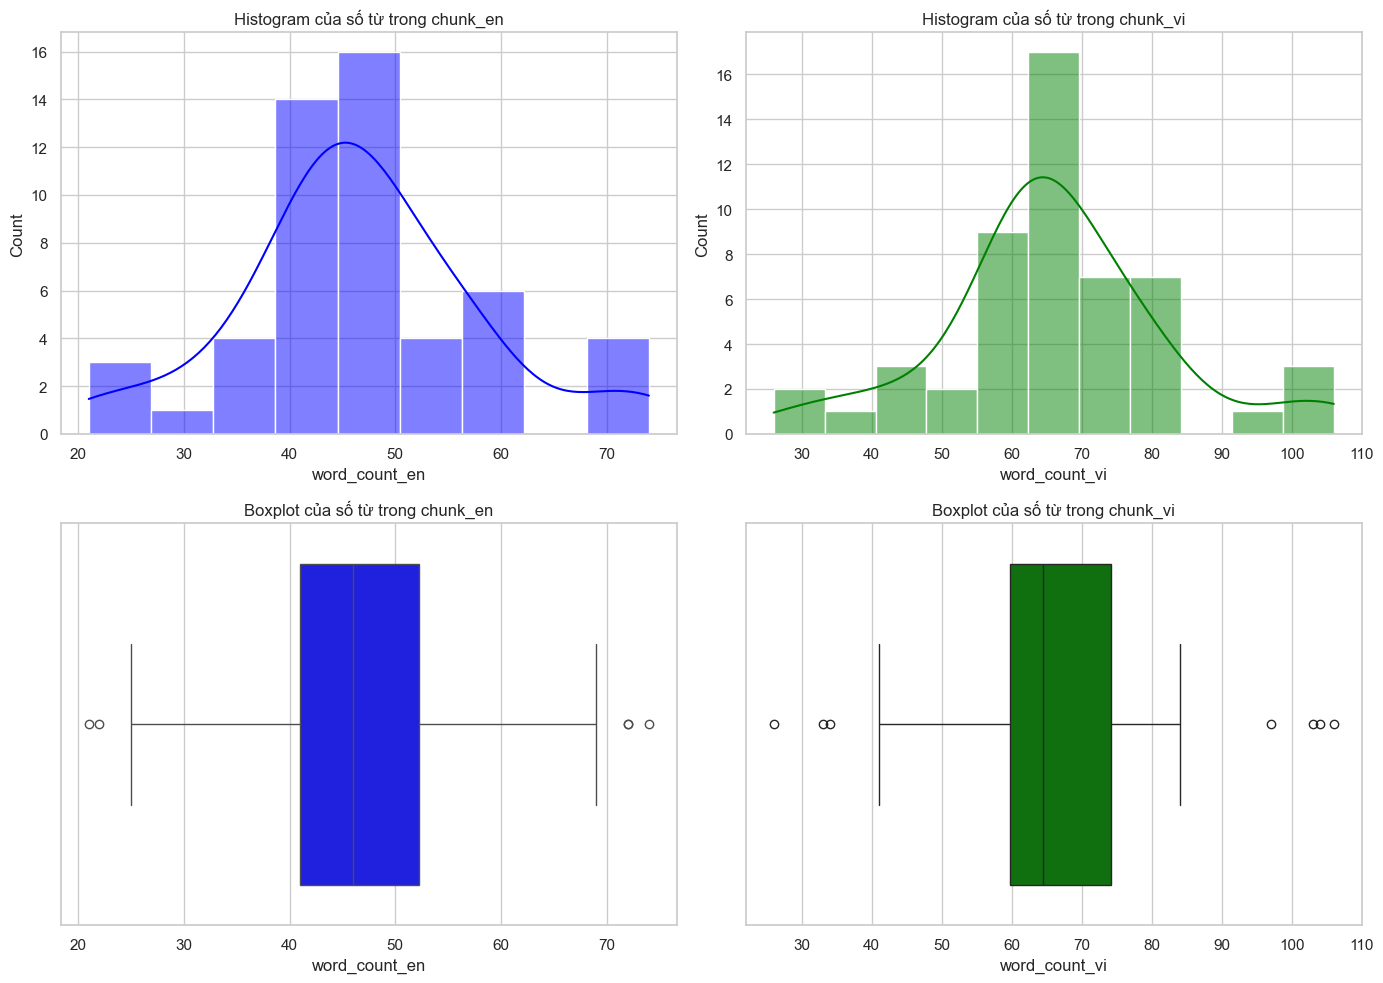

In [16]:
# Thiết lập seaborn style cho biểu đồ
sns.set(style="whitegrid")

# Tạo một figure với nhiều biểu đồ
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Histogram cho số từ trong chunk_en
sns.histplot(df_chunks['word_count_en'], kde=True, color="blue", ax=axs[0, 0])
axs[0, 0].set_title('Histogram của số từ trong chunk_en')

# Histogram cho số từ trong chunk_vi
sns.histplot(df_chunks['word_count_vi'], kde=True, color="green", ax=axs[0, 1])
axs[0, 1].set_title('Histogram của số từ trong chunk_vi')

# Boxplot cho số từ trong chunk_en
sns.boxplot(x=df_chunks['word_count_en'], ax=axs[1, 0], color="blue")
axs[1, 0].set_title('Boxplot của số từ trong chunk_en')

# Boxplot cho số từ trong chunk_vi
sns.boxplot(x=df_chunks['word_count_vi'], ax=axs[1, 1], color="green")
axs[1, 1].set_title('Boxplot của số từ trong chunk_vi')

# Điều chỉnh khoảng cách giữa các biểu đồ
plt.tight_layout()

# Hiển thị các biểu đồ
plt.show()

In [19]:
os.listdir('data/cpt/texts/20250317')

['cmc_corporation.txt',
 'cmc_global_achievements.tx',
 'cmc_global_awards.txt',
 'cmc_global_core_values.txt',
 'cmc_global_history.txt',
 'cmc_global_leadership.txt',
 'cmc_global_mission_vision.txt',
 'cmc_global_offices.txt',
 'cmc_global_office_locations.txt',
 'prompts.txt']